In [111]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
# import data
df = pd.read_csv('data.csv')
df.head()

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,NaN,NaN
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,5.0,NaN,NaN
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,4.0,NaN,NaN
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,1.0,NaN,NaN
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,8.0,NaN,NaN


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           38472 non-null  object 
 1   Continent                        38472 non-null  object 
 2   Latitude                         38472 non-null  float64
 3   Longitude                        38472 non-null  float64
 4   Average temperature per year     38472 non-null  int64  
 5   Hospital beds per 1000 people    38472 non-null  float64
 6   Medical doctors per 1000 people  38472 non-null  float64
 7   GDP/Capita                       38472 non-null  float64
 8   Population                       38472 non-null  int64  
 9   Median age                       38472 non-null  int64  
 10  Population aged 65 and over (%)  38472 non-null  int64  
 11  Date                             38472 non-null  object 
 12  Daily tests       

In [114]:
df.describe()

,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Daily tests,Cases,Deaths
count,38472.000000,38472.000000,38472.000000,38472.000000,38472.000000,38472.000000,3.847200e+04,38472.000000,38472.000000,3.057700e+04,3.821800e+04,34862.000000
mean,23.737060,20.210847,17.717145,3.165305,2.086313,19002.331415,4.896983e+07,32.751508,10.663392,3.944059e+04,2.879027e+05,8090.504733
std,26.060413,61.074922,8.134926,2.561767,1.518252,22271.107786,1.427251e+08,8.472305,6.770417,1.501847e+05,1.405243e+06,29548.753221
min,-40.900000,-106.350000,-2.000000,0.200000,0.020000,411.600000,3.412840e+05,16.000000,1.000000,-2.391720e+05,1.000000e+00,1.000000
25%,8.620000,-3.440000,11.000000,1.400000,0.820000,3659.000000,4.793900e+06,27.000000,5.000000,1.505000e+03,2.074000e+03,77.000000
50%,27.510000,21.820000,20.000000,2.500000,1.890000,8821.800000,1.148464e+07,32.000000,8.000000,5.520000e+03,2.143100e+04,527.000000
75%,45.940000,47.480000,25.000000,4.490000,3.210000,25946.200000,4.286296e+07,41.000000,16.000000,2.038200e+04,1.373770e+05,3480.500000
max,64.960000,179.410000,29.000000,13.050000,7.520000,114704.600000,1.339180e+09,48.000000,28.000000,2.945871e+06,2.860567e+07,513091.000000


In [115]:
# find the number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

Daily tests                        7895
Deaths                             3610
Cases                               254
Entity                                0
Continent                             0
Latitude                              0
Longitude                             0
Average temperature per year          0
Hospital beds per 1000 people         0
Medical doctors per 1000 people       0
GDP/Capita                            0
Population                            0
Median age                            0
Population aged 65 and over (%)       0
Date                                  0
dtype: int64

In [116]:
# remove the rows with missing values in the column 'Daily tests'
df = df.dropna(subset=['Daily tests']).reset_index(drop = True)
# remove the rows with negative values in the column 'Daily tests'
df = df[df['Daily tests'] > 0].reset_index(drop = True)

In [117]:
df.isnull().sum().sort_values(ascending=False)

Deaths                             1707
Cases                               254
Entity                                0
Continent                             0
Latitude                              0
Longitude                             0
Average temperature per year          0
Hospital beds per 1000 people         0
Medical doctors per 1000 people       0
GDP/Capita                            0
Population                            0
Median age                            0
Population aged 65 and over (%)       0
Date                                  0
Daily tests                           0
dtype: int64

Removing countries with not enough data

In [118]:
# find the sum of unique days in dataset
# total days between 1/1/2020 and 28/2/2021
total_days = 425 
total_countries = len(df['Entity'].unique())
# for each country, find the number of days 
countries = df['Entity'].unique()
for country in countries:
    # find the data frame for each country
    country_df = df[df['Entity'] == country]
    # find the number of days for each country
    country_days = country_df['Date'].nunique()
    # find the percent of days for each country
    percent = country_days / total_days
    if (percent<0.15): 
        # these countries have less than 15% of the days in the dataset
        # so we will remove them
        df.drop(df[df['Entity'] == country].index, inplace = True)
        # print(country, round(percent, 2))
# fix the index
df = df.reset_index(drop = True)

print(total_countries-len(df['Entity'].unique()),"countries were removed")

5 countries were removed


Replace NaN values before first deaths and cases for each country with 0

In [119]:
entityGroup = df.groupby('Entity')

for entity, group in entityGroup:
    for index in range(group.index[0], group.index[-1] + 1):
        if (df.isnull().iloc[index]['Cases']):
            df.at[index, 'Cases'] = 0
        else:
            break

for entity, group in entityGroup:
    for index in range(group.index[0], group.index[-1] + 1):
        if (df.isnull().iloc[index]['Deaths']):
            df.at[index, 'Deaths'] = 0
        else:
            break

df.isnull().sum().sort_values(ascending=False)

Entity                             0
Continent                          0
Latitude                           0
Longitude                          0
Average temperature per year       0
Hospital beds per 1000 people      0
Medical doctors per 1000 people    0
GDP/Capita                         0
Population                         0
Median age                         0
Population aged 65 and over (%)    0
Date                               0
Daily tests                        0
Cases                              0
Deaths                             0
dtype: int64

Convert total number of deaths and cases to daily number

In [120]:
for entity, group in entityGroup:
    for index in range(group.index[0]+1, group.index[-1] + 1):
        daily_cases = df.at[index, 'Cases'] - df.at[index - 1, 'Cases'] 
        daily_deaths = df.at[index, 'Deaths'] - df.at[index - 1, 'Deaths']
        if (daily_cases < 0):
            df.at[index, 'Cases'] = df.at[index-1, 'Cases']
        if (daily_deaths < 0):
            df.at[index, 'Deaths'] = df.at[index-1, 'Deaths']

In [121]:
# add a new column to the DataFrame for cases today
df['Daily cases'] = 0
# add a new column to the DataFrame for deaths today
df['Daily deaths'] = 0

dfCopy = df.copy()
for entity, group in entityGroup:
    for index in range(group.index[0]+1, group.index[-1] + 1):
        df.at[index, 'Daily cases'] = dfCopy.at[index, 'Cases'] - dfCopy.at[index - 1, 'Cases'] 
        df.at[index, 'Daily deaths'] = dfCopy.at[index, 'Deaths'] - dfCopy.at[index - 1, 'Deaths']

Drop the row where daily cases are more than daily tests

In [122]:
df.drop(df[df['Daily tests'] < df['Daily cases']].index, inplace = True)
df = df.reset_index(drop = True)

Create Seasons Column\
1 (winter) -> December - February \
2 (spring) -> March - May \
3 (summer) -> June - August \
4 (autumn) -> September - November

In [123]:
seasons = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'}
    
df['Date'] =  pd.to_datetime(df['Date'])
df['Season'] = df['Date'].apply(lambda x: seasons[x.month%12 // 3 + 1])

Correlation Heatmap

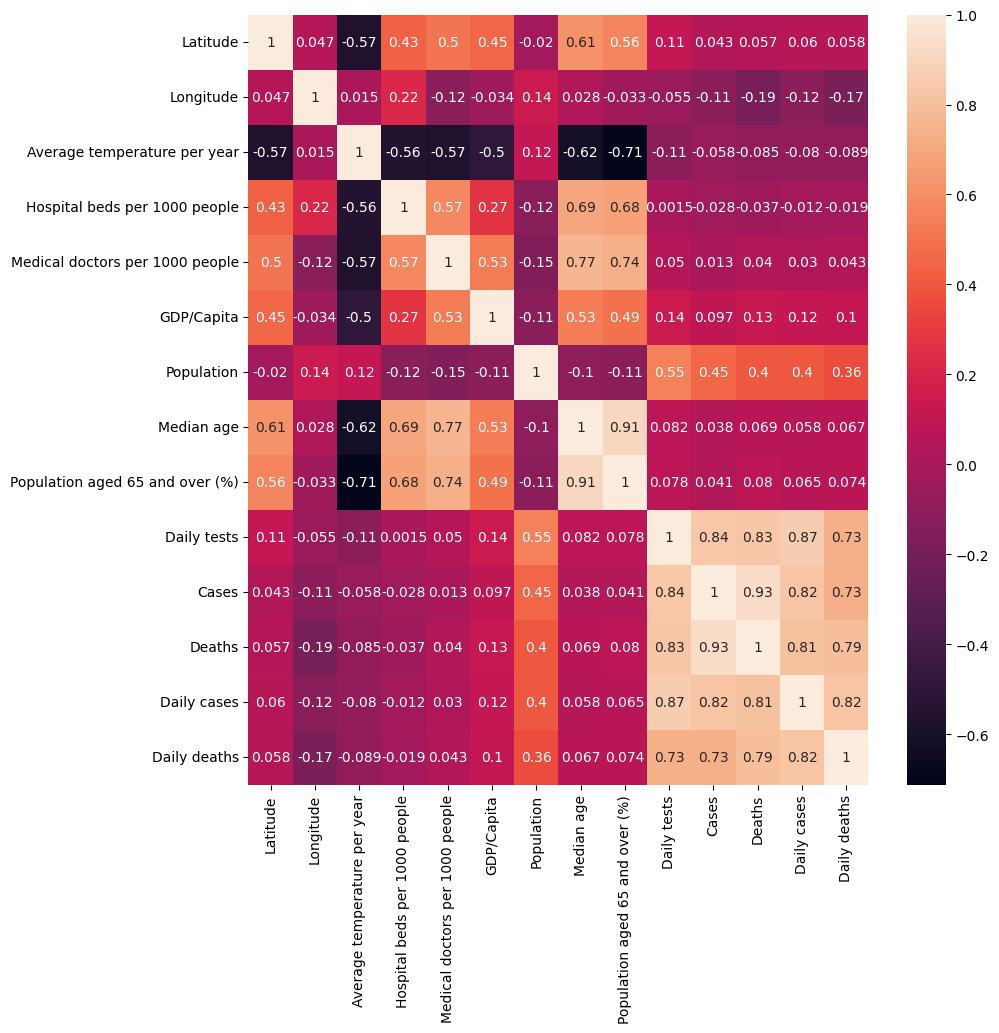

In [124]:
# Set the size of the figure
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(df.corr(numeric_only=True),annot=True,square=False, ax=ax)
plt.show()

Extract a csv file with the cleaned data

In [125]:
# export data to csv
df.to_csv('data_cleaned.csv', index=False)